In [7]:
from himalaya.ridge import Ridge, RidgeCV
import numpy as np
from compare_variance_residual.fmri.features import load_feature
from himalaya.scoring import r2_score, correlation_score
import os
import pandas as pd

In [2]:
ridge_model = RidgeCV(alphas=np.logspace(-5, 15, 21), cv=5, solver_params=dict(n_alphas_batch=1))
ols_model = Ridge(alpha=1)

In [ ]:
low_level_feature = 'powspec'

In [4]:
semantic, _ = load_feature("../../data", "english1000")
low_level, n_samples_train = load_feature("../../data", "letters")

In [4]:
ridge_model.fit(low_level[:n_samples_train], semantic[:n_samples_train]), ols_model.fit(low_level[:n_samples_train], semantic[:n_samples_train])
low_level_ridge_prediction, low_level_ols_prediction = ridge_model.predict(low_level[n_samples_train:]), ols_model.predict(low_level[n_samples_train:])

In [11]:
# save the predictions
def save_predictions(prediction, name):
    path = os.path.join("results", "predictions")
    os.makedirs(path, exist_ok=True)
    prediction_path = os.path.join(path, f"{name}_predictions.csv")
    if not os.path.exists(prediction_path):
        prediction_df = pd.DataFrame(prediction)
        prediction_df.to_csv(prediction_path, index=False)
save_predictions(low_level_ols_prediction, f"{low_level_feature}_ols")
save_predictions(low_level_ridge_prediction, f"{low_level_feature}_ridge")

In [8]:
# load the predictions
def load_predictions(name):
    path = os.path.join("results", "predictions")
    prediction_path = os.path.join(path, f"{name}_predictions.csv")
    if os.path.exists(prediction_path):
        prediction_df = pd.read_csv(prediction_path)
        return prediction_df.to_numpy()
    else:
        raise FileNotFoundError(f"{prediction_path} not found")
low_level_ols_prediction = load_predictions(f"{low_level_feature}_ols")
low_level_ridge_prediction = load_predictions(f"{low_level_feature}_ridge")

In [9]:
letters_ols_corr = correlation_score(low_level_ols_prediction, semantic[n_samples_train:])
letters_ridge_corr = correlation_score(low_level_ridge_prediction, semantic[n_samples_train:])

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import simplstyles

In [11]:
plt.style.use('nord-light-talk')

Text(1, 0.5539643432158258, '0.55')

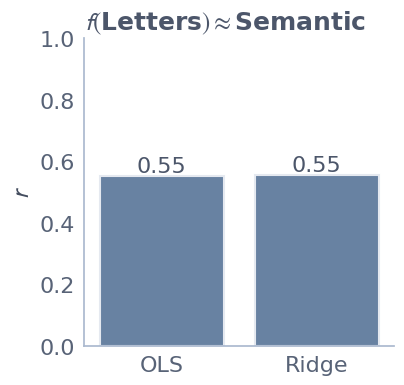

In [12]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.barplot(x=["OLS", "Ridge"], y=[letters_ols_corr.mean(), letters_ridge_corr.mean()])
plt.title(r"$f($Letters$)\approx$Semantic")
plt.ylim(0,1)
plt.ylabel(r"$r$")
# write the mean of the correlation
plt.text(0, letters_ols_corr.mean(), f"{letters_ols_corr.mean():.2f}", ha='center', va='bottom')
plt.text(1, letters_ridge_corr.mean(), f"{letters_ridge_corr.mean():.2f}", ha='center', va='bottom')

$R^2$ scores

In [12]:
letters_ols_r2 = r2_score(low_level_ols_prediction, semantic[n_samples_train:])
letters_ridge_r2 = r2_score(low_level_ridge_prediction, semantic[n_samples_train:])

Text(1, -2.3382418155670166, '-2.34')

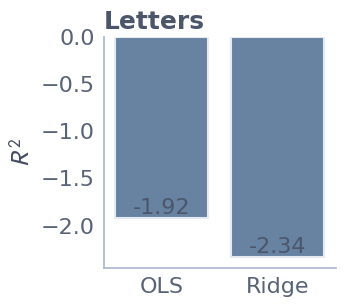

In [18]:
fig, ax = plt.subplots(figsize=(3, 3))
sns.barplot(x=["OLS", "Ridge"], y=[letters_ols_r2.mean(), letters_ridge_r2.mean()])
plt.title("Letters")
# plt.ylim(0,1)
plt.ylabel(r"$R^2$")
# write the mean of the correlation
plt.text(0, letters_ols_r2.mean(), f"{letters_ols_r2.mean():.2f}", ha='center', va='bottom')
plt.text(1, letters_ridge_r2.mean(), f"{letters_ridge_r2.mean():.2f}", ha='center', va='bottom')